In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv("out/data.csv", sep='\s*,\s*', engine='python')
sns.set_style("whitegrid")
data.head()

method  cores      time
0         seq      1  1.214150
1  par-atomic      1  1.219030
2  par-atomic      4  0.975418
3  par-atomic      8  0.905395
4  par-atomic     12  0.553121

In [20]:
time_serial = data[data['cores'] == 1]['time']
data['speedup'] = time_serial / data['time']
#data['eff'] = data['speedup'] / data['cores']
data.head(10)

method  cores      time  speedup
0           seq      1  1.214150      1.0
1    par-atomic      1  1.219030      1.0
2    par-atomic      4  0.975418      NaN
3    par-atomic      8  0.905395      NaN
4    par-atomic     12  0.553121      NaN
5    par-atomic     16  0.546893      NaN
6    par-atomic     20  0.285332      NaN
7    par-atomic     24  0.301138      NaN
8           seq      1  1.178850      1.0
9  par-critical      1  2.557440      1.0

In [21]:
seqLinearTime = []
seqLinearSpeedup = []
for i in data['cores'].unique():
    seqLinearTime.append(time_serial / i)
    seqLinearSpeedup.append(i)
seqLinearTime

[0    1.21415
 1    1.21903
 8    1.17885
 9    2.55744
 Name: time, dtype: float64, 0    0.303538
 1    0.304757
 8    0.294712
 9    0.639360
 Name: time, dtype: float64, 0    0.151769
 1    0.152379
 8    0.147356
 9    0.319680
 Name: time, dtype: float64, 0    0.101179
 1    0.101586
 8    0.098237
 9    0.213120
 Name: time, dtype: float64, 0    0.075884
 1    0.076189
 8    0.073678
 9    0.159840
 Name: time, dtype: float64, 0    0.060708
 1    0.060951
 8    0.058942
 9    0.127872
 Name: time, dtype: float64, 0    0.050590
 1    0.050793
 8    0.049119
 9    0.106560
 Name: time, dtype: float64]

In [22]:
import matplotlib.ticker as ticker
ax1.yaxis.set_major_locator(ticker.MultipleLocator(100))
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter())

# Runtime

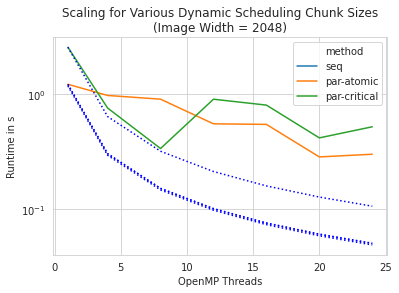

In [23]:
ax1 = sns.lineplot(data=data, x=data['cores'], y=data['time'], hue=data['method'], palette="tab10")
ax1.plot(data['cores'].unique(), seqLinearTime, c="blue", ls=":", mec="gray", mew=0.1)
#plt.axhline(y=time_serial, color='r', linestyle='-')
# plt.plot([time_serial], marker=11)
ax1.set(yscale="log", ylabel='Runtime in s', xlabel='OpenMP Threads', title='Scaling for Various Dynamic Scheduling Chunk Sizes\n(Image Width = 2048)')
plt.savefig("runtime-hist.pdf", bbox_inches='tight')

In [151]:
plt.clf()

<Figure size 432x288 with 0 Axes>

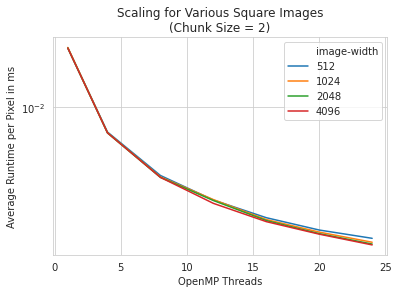

In [152]:
data3 = data[data['chunk-size'] == 2]
data3['time'] = data['time'] / data['image-width'] / data['image-width']
ax1 = sns.lineplot(data=data3, x=data3['cores'], y=data3['time'], hue=data3['image-width'], palette="tab10")
# ax1.plot(data['image-width'].unique(), seqLinearTime, c="blue", ls=":", mec="gray", mew=0.1)
#plt.axhline(y=time_serial, color='r', linestyle='-')
ax1.set(yscale="log", ylabel='Average Runtime per Pixel in ms', xlabel='OpenMP Threads', title='Scaling for Various Square Images\n(Chunk Size = 2)')
plt.savefig("img-width-mandel.pdf", bbox_inches='tight')

In [144]:
plt.clf()

<Figure size 432x288 with 0 Axes>

# Mflop/s

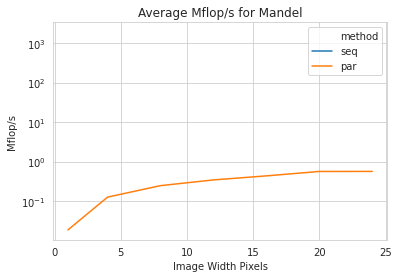

In [84]:
ax1 = sns.lineplot(data=data, x=data['cores'], y=data['Mflops'], hue=data['method'], palette="tab10")
#ax1.plot(data['image-width'].unique(), seqLinearTime, c="blue", ls=":", mec="gray", mew=0.1)
ax1.set(yscale="log", ylabel='Mflop/s', xlabel='Image Width Pixels', title='Average Mflop/s for Mandel')
plt.savefig("flops-mandel.pdf", bbox_inches='tight')

In [74]:
plt.clf()

<Figure size 432x288 with 0 Axes>